## Problem Statement

In [1]:
# Prediction task is to determine the income level for the person
# represented by the record.  Incomes have been binned at the $50K
# level to present a binary classification problem,

## Hypotheses Generation

In [2]:
# There exists significant impacts of the variables (below) on the dependent variable.

# Age
# Marital Status
# Family Members
# No. of Dependents
# Tax Paid
# Investment (Mutual Fund, Stock)
# Return from Investments
# Education
# Spouse Education
# Nationality
# Occupation
# Region in US
### Year started working (cycles of the U.S. economy)
# Race
# Occupation category

In [3]:
# The instance weight indicates the number of people in the population
# that each record represents due to stratified sampling.
# To do real analysis and derive conclusions, this field must be used.
# This attribute should *not* be used in the classifiers, so it is
# set to "ignore" in this file.

## EDA

#### Load the datasets

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.shape

(199523, 41)

In [7]:
test_df.shape

(99762, 41)

In [8]:
train_df.head(3)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000


In [9]:
test_df.head(3)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000


#### check missing values

test dataset has no columns with missing values

In [10]:
(test_df.count()/(test_df.count().max())).sort_values(ascending = True)

age                                 1.0
d_household_family_stat             1.0
d_household_summary                 1.0
migration_msa                       1.0
migration_reg                       1.0
migration_within_reg                1.0
live_1_year_ago                     1.0
migration_sunbelt                   1.0
num_person_Worked_employer          1.0
family_members_under_18             1.0
country_father                      1.0
country_mother                      1.0
country_self                        1.0
citizenship                         1.0
business_or_self_employed           1.0
fill_questionnaire_veteran_admin    1.0
veterans_benefits                   1.0
weeks_worked_in_year                1.0
state_of_previous_residence         1.0
year                                1.0
region_of_previous_residence        1.0
dividend_from_Stocks                1.0
class_of_worker                     1.0
industry_code                       1.0
occupation_code                     1.0


In [11]:
test_df.dtypes.sort_values()

age                                  int64
weeks_worked_in_year                 int64
industry_code                        int64
occupation_code                      int64
veterans_benefits                    int64
wage_per_hour                        int64
year                                 int64
business_or_self_employed            int64
dividend_from_Stocks                 int64
capital_losses                       int64
capital_gains                        int64
num_person_Worked_employer           int64
migration_within_reg                object
live_1_year_ago                     object
country_father                      object
family_members_under_18             object
migration_reg                       object
country_mother                      object
country_self                        object
citizenship                         object
fill_questionnaire_veteran_admin    object
migration_sunbelt                   object
migration_msa                       object
region_of_p

In [12]:
test_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99762 entries, 0 to 99761
Data columns (total 41 columns):
age                                 99762 non-null int64
class_of_worker                     99762 non-null object
industry_code                       99762 non-null int64
occupation_code                     99762 non-null int64
education                           99762 non-null object
wage_per_hour                       99762 non-null int64
enrolled_in_edu_inst_lastwk         99762 non-null object
marital_status                      99762 non-null object
major_industry_code                 99762 non-null object
major_occupation_code               99762 non-null object
race                                99762 non-null object
hispanic_origin                     99762 non-null object
sex                                 99762 non-null object
member_of_labor_union               99762 non-null object
reason_for_unemployment             99762 non-null object
full_parttime_employment_

In [13]:
(train_df.count()/(train_df.count().max())).sort_values(ascending = True)

migration_msa                       0.500328
migration_reg                       0.500328
migration_within_reg                0.500328
migration_sunbelt                   0.500328
country_father                      0.966355
country_mother                      0.969332
country_self                        0.982994
hispanic_origin                     0.995620
state_of_previous_residence         0.996452
d_household_summary                 1.000000
live_1_year_ago                     1.000000
age                                 1.000000
d_household_family_stat             1.000000
citizenship                         1.000000
business_or_self_employed           1.000000
fill_questionnaire_veteran_admin    1.000000
veterans_benefits                   1.000000
weeks_worked_in_year                1.000000
num_person_Worked_employer          1.000000
family_members_under_18             1.000000
region_of_previous_residence        1.000000
tax_filer_status                    1.000000
class_of_w

In [14]:
# following columns have lots of missing values
# migration_msa                       0.500328
# migration_reg                       0.500328
# migration_within_reg                0.500328
# migration_sunbelt                   0.500328

In [15]:
train_df.dtypes.sort_values()

age                                  int64
weeks_worked_in_year                 int64
veterans_benefits                    int64
business_or_self_employed            int64
num_person_Worked_employer           int64
year                                 int64
dividend_from_Stocks                 int64
capital_losses                       int64
capital_gains                        int64
income_level                         int64
industry_code                        int64
occupation_code                      int64
wage_per_hour                        int64
race                                object
class_of_worker                     object
fill_questionnaire_veteran_admin    object
citizenship                         object
country_self                        object
country_mother                      object
country_father                      object
family_members_under_18             object
education                           object
migration_sunbelt                   object
live_1_year

In [16]:
# can't simply drop na's; losing more than half of all rows
len(train_df.dropna())/float(len(train_df))

0.47343915237842255

#### distribution of target variable (very biased)

In [17]:
train_df.income_level = train_df.income_level.apply(lambda x: 0 if x == -50000 else 1)
test_df.income_level = test_df.income_level.apply(lambda x: 0 if x == '-50000' else 1)

In [18]:
a = train_df.income_level.value_counts()
b = test_df.income_level.value_counts()

In [19]:
a/a.sum()

0    0.937942
1    0.062058
Name: income_level, dtype: float64

In [20]:
b/b.sum()

0    0.937992
1    0.062008
Name: income_level, dtype: float64

#### plotting

In [21]:
# 1. a histogram overlapped with density curve. then apply num variables; Use R code

In [22]:
# 2. scatter plot (How to separate different classes?)

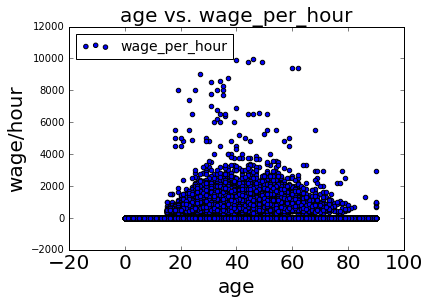

In [23]:
import matplotlib.pyplot as plt
# Setup matplotlib to display in notebook:
%matplotlib inline

plt.scatter(train_df.age, train_df.wage_per_hour)

plt.legend(fontsize=10)
plt.xticks(fontsize = 20)
plt.title('age vs. wage_per_hour', fontsize = 20)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(loc = "upper left", fontsize = 14)
ax.set_ylabel("wage/hour", fontsize = 20)
ax.set_xlabel('age', fontsize = 20)

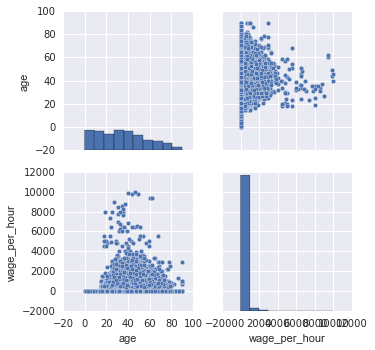

In [24]:
import seaborn as sns
sns.pairplot(train_df[['age', 'wage_per_hour']])

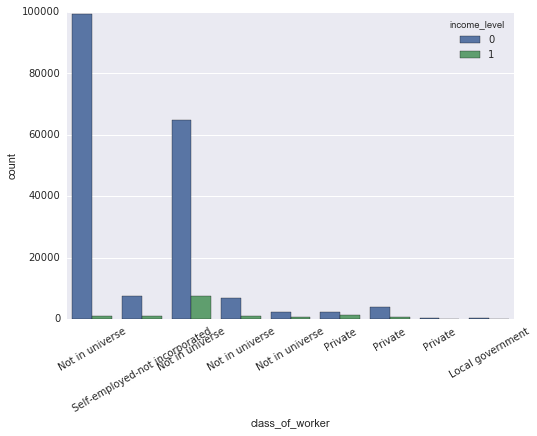

In [25]:
ax = sns.countplot(x="class_of_worker", hue="income_level", data=train_df)
ax.set_xticklabels(train_df.class_of_worker,rotation=30)

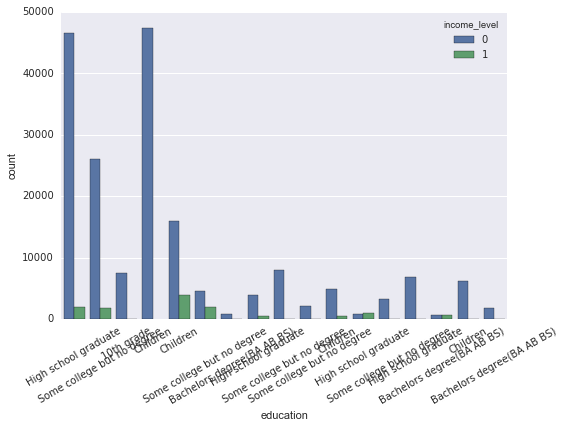

In [26]:
ax = sns.countplot(x="education", hue="income_level", data=train_df)
ax.set_xticklabels(train_df.education,rotation=30)

## Data Cleansing

In [27]:
num_train = train_df._get_numeric_data()
num_test = test_df._get_numeric_data()

In [28]:
num_test.shape

(99762, 13)

In [29]:
num_train.corr()['income_level'].sort_values()

occupation_code               0.013414
year                          0.014794
wage_per_hour                 0.024528
business_or_self_employed     0.040473
age                           0.135720
veterans_benefits             0.140930
capital_losses                0.147417
dividend_from_Stocks          0.175779
industry_code                 0.196190
num_person_Worked_employer    0.222684
capital_gains                 0.240725
weeks_worked_in_year          0.262316
income_level                  1.000000
Name: income_level, dtype: float64

In [30]:
num_test.corr()['income_level'].sort_values()

occupation_code               0.014418
year                          0.019117
wage_per_hour                 0.020252
business_or_self_employed     0.043012
age                           0.137499
veterans_benefits             0.139473
capital_losses                0.147539
dividend_from_Stocks          0.184578
industry_code                 0.194715
num_person_Worked_employer    0.227078
capital_gains                 0.239709
weeks_worked_in_year          0.262054
income_level                  1.000000
Name: income_level, dtype: float64

### Remove the column weeks_worked_in_year?

In [31]:
cat_test = test_df[list(set(test_df.columns.values) - set(num_test.columns.values))]

In [32]:
cat_train = train_df[list(set(train_df.columns.values) - set(num_train.columns.values))]

In [33]:
cat_train.shape

(199523, 28)

In [34]:
cat_test.shape

(99762, 28)

#### Again, only missing values are the columns in cat_train


#### Remove them for now, come back later for imputation

In [35]:
(cat_test.count()/(cat_test.count().max())).sort_values(ascending = True)

migration_sunbelt                   1.0
region_of_previous_residence        1.0
fill_questionnaire_veteran_admin    1.0
race                                1.0
class_of_worker                     1.0
major_occupation_code               1.0
state_of_previous_residence         1.0
marital_status                      1.0
country_father                      1.0
country_self                        1.0
tax_filer_status                    1.0
reason_for_unemployment             1.0
migration_within_reg                1.0
migration_reg                       1.0
hispanic_origin                     1.0
major_industry_code                 1.0
member_of_labor_union               1.0
country_mother                      1.0
migration_msa                       1.0
d_household_summary                 1.0
live_1_year_ago                     1.0
enrolled_in_edu_inst_lastwk         1.0
education                           1.0
full_parttime_employment_stat       1.0
sex                                 1.0


In [37]:
(1- cat_train.count()/(cat_train.count().max())).sort_values(ascending = False)

migration_reg                       0.499672
migration_within_reg                0.499672
migration_msa                       0.499672
migration_sunbelt                   0.499672
country_father                      0.033645
country_mother                      0.030668
country_self                        0.017006
hispanic_origin                     0.004380
state_of_previous_residence         0.003548
race                                0.000000
citizenship                         0.000000
sex                                 0.000000
full_parttime_employment_stat       0.000000
education                           0.000000
enrolled_in_edu_inst_lastwk         0.000000
live_1_year_ago                     0.000000
d_household_summary                 0.000000
region_of_previous_residence        0.000000
major_industry_code                 0.000000
member_of_labor_union               0.000000
class_of_worker                     0.000000
family_members_under_18             0.000000
fill_quest

In [172]:
cat_train = cat_train[list(set(cat_train.columns.values) - set (["migration_sunbelt", "migration_within_reg", "migration_msa", "migration_reg"]))]

In [107]:
cat_test = cat_test[list(set(cat_test.columns.values) - set (["migration_sunbelt", "migration_within_reg", "migration_msa", "migration_reg"]))]

#### Change the other missing values from float.nan to 'unavailable'

In [144]:
import numpy as np
import math

In [173]:
(cat_train.count()/(cat_train.count().max())).sort_values(ascending = True)

country_father                      0.966355
country_mother                      0.969332
country_self                        0.982994
hispanic_origin                     0.995620
state_of_previous_residence         0.996452
citizenship                         1.000000
region_of_previous_residence        1.000000
fill_questionnaire_veteran_admin    1.000000
race                                1.000000
class_of_worker                     1.000000
major_occupation_code               1.000000
marital_status                      1.000000
reason_for_unemployment             1.000000
family_members_under_18             1.000000
major_industry_code                 1.000000
member_of_labor_union               1.000000
d_household_summary                 1.000000
live_1_year_ago                     1.000000
enrolled_in_edu_inst_lastwk         1.000000
education                           1.000000
full_parttime_employment_stat       1.000000
sex                                 1.000000
tax_filer_

In [153]:
cat_train.state_of_previous_residence[cat_train.state_of_previous_residence.isnull()]

70        NaN
205       NaN
246       NaN
384       NaN
790       NaN
882       NaN
1271      NaN
1322      NaN
1364      NaN
1638      NaN
2251      NaN
2882      NaN
3392      NaN
3409      NaN
3428      NaN
3516      NaN
3519      NaN
3632      NaN
3769      NaN
4266      NaN
4396      NaN
4538      NaN
4691      NaN
4759      NaN
5292      NaN
5382      NaN
5520      NaN
5684      NaN
5832      NaN
6565      NaN
         ... 
192091    NaN
192211    NaN
192473    NaN
192531    NaN
193343    NaN
193751    NaN
194531    NaN
194683    NaN
194708    NaN
194751    NaN
194752    NaN
195217    NaN
195307    NaN
195802    NaN
195886    NaN
196126    NaN
196590    NaN
196836    NaN
197357    NaN
197788    NaN
197928    NaN
198425    NaN
198514    NaN
198910    NaN
198948    NaN
199026    NaN
199042    NaN
199189    NaN
199242    NaN
199360    NaN
Name: state_of_previous_residence, dtype: object

In [179]:
cat_train.state_of_previous_residence = cat_train.state_of_previous_residence.apply(lambda x: 'unavailable' if x.__class__.__name__ == 'float' else x)
cat_train.hispanic_origin = cat_train.hispanic_origin.apply(lambda x: 'unavailable' if x.__class__.__name__ == 'float' else x)
cat_train.country_self = cat_train.country_self.apply(lambda x: 'unavailable' if x.__class__.__name__ == 'float' else x)
cat_train.country_mother = cat_train.country_mother.apply(lambda x: 'unavailable' if x.__class__.__name__ == 'float' else x)
cat_train.country_father = cat_train.country_father.apply(lambda x: 'unavailable' if x.__class__.__name__ == 'float' else x)

In [180]:
(cat_train.count()/(cat_train.count().max())).sort_values(ascending = True)

citizenship                         1.0
region_of_previous_residence        1.0
fill_questionnaire_veteran_admin    1.0
race                                1.0
class_of_worker                     1.0
major_occupation_code               1.0
state_of_previous_residence         1.0
marital_status                      1.0
country_father                      1.0
country_self                        1.0
tax_filer_status                    1.0
reason_for_unemployment             1.0
hispanic_origin                     1.0
major_industry_code                 1.0
member_of_labor_union               1.0
country_mother                      1.0
d_household_summary                 1.0
live_1_year_ago                     1.0
enrolled_in_edu_inst_lastwk         1.0
education                           1.0
full_parttime_employment_stat       1.0
sex                                 1.0
family_members_under_18             1.0
d_household_family_stat             1.0
dtype: float64

In [181]:
cat_train.head()

,citizenship,sex,full_parttime_employment_stat,education,enrolled_in_edu_inst_lastwk,live_1_year_ago,d_household_summary,country_mother,member_of_labor_union,major_industry_code,...,country_father,marital_status,state_of_previous_residence,major_occupation_code,class_of_worker,race,fill_questionnaire_veteran_admin,region_of_previous_residence,family_members_under_18,d_household_family_stat
0,Native- Born in the United States,Female,Not in labor force,High school graduate,Not in universe,Not in universe under 1 year old,Other relative of householder,United-States,Not in universe,Not in universe or children,...,United-States,Widowed,Not in universe,Not in universe,Not in universe,White,Not in universe,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily
1,Native- Born in the United States,Male,Children or Armed Forces,Some college but no degree,Not in universe,No,Householder,United-States,Not in universe,Construction,...,United-States,Divorced,Arkansas,Precision production craft & repair,Self-employed-not incorporated,White,Not in universe,South,Not in universe,Householder
2,Foreign born- Not a citizen of U S,Female,Not in labor force,10th grade,High school,Not in universe under 1 year old,Child 18 or older,Vietnam,Not in universe,Not in universe or children,...,Vietnam,Never married,Not in universe,Not in universe,Not in universe,Asian or Pacific Islander,Not in universe,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily
3,Native- Born in the United States,Female,Children or Armed Forces,Children,Not in universe,Yes,Child under 18 never married,United-States,Not in universe,Not in universe or children,...,United-States,Never married,Not in universe,Not in universe,Not in universe,White,Not in universe,Not in universe,Both parents present,Child <18 never marr not in subfamily
4,Native- Born in the United States,Female,Children or Armed Forces,Children,Not in universe,Yes,Child under 18 never married,United-States,Not in universe,Not in universe or children,...,United-States,Never married,Not in universe,Not in universe,Not in universe,White,Not in universe,Not in universe,Both parents present,Child <18 never marr not in subfamily


### Combined the values in categorical columns that has counts < 5% ???
### If so, make sure you do the same to the Test dataset

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score

In [2]:
orig_df = pd.read_csv("census_orig.csv")
rose_df = pd.read_csv("census_rose.csv")
smote_df = pd.read_csv("census_smote.csv")
under_df = pd.read_csv("census_under.csv")
over_df = pd.read_csv("census_over.csv")
test_df = pd.read_csv("test.csv")
orig_df.drop("Unnamed: 0", axis = 1, inplace = True)
rose_df.drop("Unnamed: 0", axis = 1, inplace = True)
smote_df.drop("Unnamed: 0", axis = 1, inplace = True)
under_df.drop("Unnamed: 0", axis = 1, inplace = True)
over_df.drop("Unnamed: 0", axis = 1, inplace = True)
test_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
test_df.income_level.value_counts()

0    93576
1     6186
Name: income_level, dtype: int64

### Train the Classifier

In [4]:
feature_list = orig_df.columns.values.tolist()

In [5]:
cat_feature_list = list(set(feature_list) - set(orig_df._get_numeric_data().columns.values.tolist()))

In [6]:
def get_dummy_func(df):
    df_new = df[['num_person_Worked_employer', 'year']]
    for category in cat_feature_list:
        series = df[category]
        dummies = pd.get_dummies(series, prefix=category)
        df_new = pd.concat([df_new, dummies], axis=1)
    return df_new

In [7]:
orig = get_dummy_func(orig_df)
under = get_dummy_func(under_df)
over = get_dummy_func(over_df)
smote = get_dummy_func(smote_df)
rose = get_dummy_func(rose_df)
test = get_dummy_func(test_df)

In [8]:
np.shape(test.values)

(99762, 104)

0.25216872446871985

In [16]:
def do_cm_cr(model, X_train, y_train, X_test, y_test, names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     y_score = model.decision_function(X_test)
    y_proba_score = model.predict_proba(X_test)


    FPR, TPR, thresholds = roc_curve(y_test, y_proba_score[:,1])
    ROC_AUC_orig = auc(FPR, TPR)
    if ROC_AUC_orig > 0.5:
        ROC_AUC = ROC_AUC_orig
    else:
        print "Classifier Flipped"
        y_pred = 1 - y_pred
        y_proba_score = 1- y_proba_score
        ROC_AUC = 1 - ROC_AUC_orig
    
    print "AUC is:", ROC_AUC, "\n"

    print "Classification Report: \n", (classification_report(y_test, y_pred)), "\n"

    print "Confusion Matrix: \n"
    confmat = confusion_matrix(y_test, y_pred)
    idx = ['Negative', 'Positive']
    col = ['Predicted Negative', 'Predicted Positive']
    print pd.DataFrame(confmat, index=idx, columns=col), "\n"

    
    TN = confmat[0][0]
    FP = confmat[0][1]
    FN = confmat[1][0]
    TP = confmat[1][1]
    TPR = float(TP)/(TP+FN)
    TNR = float(TN)/(TN+FP)

    print "True Positive Rate is: %f" %TPR
    print "True Negative Rate is: %f" %TNR


In [17]:
logreg = LogisticRegression()
do_cm_cr(logreg, orig.values, orig_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.931593009036 

Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     93576
          1       0.65      0.31      0.42      6186

avg / total       0.94      0.95      0.94     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               92573                1003
Positive                4294                1892 

True Positive Rate is: 0.305852
True Negative Rate is: 0.989281


In [24]:
(89-31)/float(89)

0.651685393258427

In [22]:
logreg = LogisticRegression()
do_cm_cr(logreg, rose.values, rose_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC is: 0.931567172096 

Classification Report: 
             precision    recall  f1-score   support

          0       0.99      0.83      0.90     93576
          1       0.25      0.89      0.39      6186

avg / total       0.95      0.83      0.87     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               77283               16293
Positive                 692                5494 

True Positive Rate is: 0.888134
True Negative Rate is: 0.825885


In [18]:
logreg = LogisticRegression()
do_cm_cr(logreg, smote.values, smote_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier Flipped
AUC is: 0.930312798716 

Classification Report: 
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     93576
          1       0.65      0.31      0.42      6186

avg / total       0.94      0.95      0.94     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               92536                1040
Positive                4287                1899 

True Positive Rate is: 0.306984
True Negative Rate is: 0.988886


In [20]:
logreg = LogisticRegression()
do_cm_cr(logreg, under.values, under_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier Flipped
AUC is: 0.931453115381 

Classification Report: 
             precision    recall  f1-score   support

          0       0.99      0.87      0.92     93576
          1       0.29      0.83      0.44      6186

avg / total       0.94      0.87      0.89     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               81284               12292
Positive                1049                5137 

True Positive Rate is: 0.830424
True Negative Rate is: 0.868642


In [21]:
logreg = LogisticRegression()
do_cm_cr(logreg, over.values, over_df[[-1]], test.values, test_df[[-1]], ['0', '1'])

/home/fei/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier Flipped
AUC is: 0.93159864683 

Classification Report: 
             precision    recall  f1-score   support

          0       0.99      0.83      0.90     93576
          1       0.25      0.89      0.39      6186

avg / total       0.95      0.83      0.87     99762


Confusion Matrix: 

          Predicted Negative  Predicted Positive
Negative               77433               16143
Positive                 710                5476 

True Positive Rate is: 0.885225
True Negative Rate is: 0.827488
